# Corona Dataset
from https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data
Data is in .csv format

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#magic command for nice inline plots
%matplotlib notebook
import seaborn as sns

In [2]:
#load the data
rawdata_df = pd.read_csv('./CoronaData.csv')

Let's check if data is correctly loaded and do some sanity checks

In [3]:
rawdata_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,05/08/2020,5,8,2020,82,6,Afghanistan,AF,AFG,38041757.0,Asia,2.896817
1,04/08/2020,4,8,2020,37,4,Afghanistan,AF,AFG,38041757.0,Asia,2.975677
2,03/08/2020,3,8,2020,0,1,Afghanistan,AF,AFG,38041757.0,Asia,3.246433
3,02/08/2020,2,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.703825
4,01/08/2020,1,8,2020,168,12,Afghanistan,AF,AFG,38041757.0,Asia,3.735369


In [4]:
rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34313 entries, 0 to 34312
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     34313 non-null  object 
 1   day                                                         34313 non-null  int64  
 2   month                                                       34313 non-null  int64  
 3   year                                                        34313 non-null  int64  
 4   cases                                                       34313 non-null  int64  
 5   deaths                                                      34313 non-null  int64  
 6   countriesAndTerritories                                     34313 non-null  object 
 7   geoId                                                       34169 non-null  object 
 

In [5]:
#Check for na
rawdata_df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          144
countryterritoryCode                                            64
popData2019                                                     64
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2781
dtype: int64

There is data missing for geoID for countryterritoryCode PopulationData and the Cumulative number of case for the last 14 days. We will look into all of the missing data one after another

In [6]:
rawdata_df[rawdata_df['geoId'].isnull()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
21957,05/08/2020,5,8,2020,64,0,Namibia,NaN,NAM,2494524.0,Africa,44.256940
21958,04/08/2020,4,8,2020,112,1,Namibia,NaN,NAM,2494524.0,Africa,42.573252
21959,03/08/2020,3,8,2020,70,0,Namibia,NaN,NAM,2494524.0,Africa,41.971935
21960,02/08/2020,2,8,2020,95,1,Namibia,NaN,NAM,2494524.0,Africa,40.929652
21961,01/08/2020,1,8,2020,77,0,Namibia,NaN,NAM,2494524.0,Africa,42.132287
...,...,...,...,...,...,...,...,...,...,...,...,...
22096,19/03/2020,19,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
22097,18/03/2020,18,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
22098,17/03/2020,17,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
22099,16/03/2020,16,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN


In [7]:
rawdata_df[rawdata_df['geoId'].isnull()].geoId.isnull().value_counts()

True    144
Name: geoId, dtype: int64

The missing geoId is only related to Namibia. According to Wikipedia the geoId should be 'NA' (Maybe this caused the error?) We will just insert the NA into the geoID

In [8]:
rawdata_df.loc[rawdata_df['countryterritoryCode'] == 'NAM', ['geoId']] = 'NA'

In [9]:
rawdata_df[rawdata_df['countryterritoryCode'] == 'NAM'].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
21957,05/08/2020,5,8,2020,64,0,Namibia,NA,NAM,2494524.0,Africa,44.256940
21958,04/08/2020,4,8,2020,112,1,Namibia,NA,NAM,2494524.0,Africa,42.573252
21959,03/08/2020,3,8,2020,70,0,Namibia,NA,NAM,2494524.0,Africa,41.971935
21960,02/08/2020,2,8,2020,95,1,Namibia,NA,NAM,2494524.0,Africa,40.929652
21961,01/08/2020,1,8,2020,77,0,Namibia,NA,NAM,2494524.0,Africa,42.132287


Next is the 'countryterritoryCode

In [10]:
rawdata_df[rawdata_df['countryterritoryCode'].isnull()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
6088,10/03/2020,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6089,02/03/2020,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6090,01/03/2020,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6091,29/02/2020,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6092,28/02/2020,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6147,04/01/2020,4,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6148,03/01/2020,3,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6149,02/01/2020,2,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6150,01/01/2020,1,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN


Missing Info in Country Territory Code is caused by cases recorded on flights. (Apparently only to Japan). This causes also missing data in the popData2019 column (makes perfectly sense). We will check how many cases are recorded and percentage this resembles

In [11]:
flight_cases = rawdata_df[rawdata_df['countryterritoryCode'].isnull()].cases.sum()
print ('Cases recorded during flights: ', flight_cases)
print ('Percentage: ', flight_cases / rawdata_df.cases.sum())

Cases recorded during flights:  696
Percentage:  3.758184783790172e-05


The recorded cases on flight are only 0.004% That is neglectable and we will drop the rows

In [12]:
#serach the indexes for the flightcases and uses them to delete the rows
flight_cases_index = rawdata_df[rawdata_df['countryterritoryCode'].isnull()].index
rawdata_df.drop(flight_cases_index, inplace=True)

So what about the cumulative cases for the last 14 days?

In [13]:
rawdata_df[rawdata_df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].isnull()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
196,12/01/2020,12,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
197,11/01/2020,11,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
198,10/01/2020,10,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
199,09/01/2020,9,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
200,08/01/2020,8,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
34308,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
34309,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
34310,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
34311,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


Seems to affect all countries. I will check on different countries

In [14]:
rawdata_df[(rawdata_df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].isnull()) & (rawdata_df['geoId'] == 'CH')].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
30427,12/01/2020,12,1,2020,0,0,Switzerland,CH,CHE,8544527.0,Europe,NaN
30428,11/01/2020,11,1,2020,0,0,Switzerland,CH,CHE,8544527.0,Europe,NaN
30429,10/01/2020,10,1,2020,0,0,Switzerland,CH,CHE,8544527.0,Europe,NaN
30430,09/01/2020,9,1,2020,0,0,Switzerland,CH,CHE,8544527.0,Europe,NaN
30431,08/01/2020,8,1,2020,0,0,Switzerland,CH,CHE,8544527.0,Europe,NaN


In [15]:
rawdata_df[(rawdata_df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].isnull()) & (rawdata_df['geoId'] == 'DE')].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
12392,12/01/2020,12,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,NaN
12393,11/01/2020,11,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,NaN
12394,10/01/2020,10,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,NaN
12395,09/01/2020,9,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,NaN
12396,08/01/2020,8,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,NaN


In [16]:
rawdata_df[(rawdata_df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].isnull()) & (rawdata_df['geoId'] == 'CN')].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
6933,12/01/2020,12,1,2020,0,0,China,CN,CHN,1.433784e+09,Asia,NaN
6934,11/01/2020,11,1,2020,0,1,China,CN,CHN,1.433784e+09,Asia,NaN
6935,10/01/2020,10,1,2020,0,0,China,CN,CHN,1.433784e+09,Asia,NaN
6936,09/01/2020,9,1,2020,0,0,China,CN,CHN,1.433784e+09,Asia,NaN
6937,08/01/2020,8,1,2020,0,0,China,CN,CHN,1.433784e+09,Asia,NaN


It seems this affects only the first 14 days of the pandemie. Dropping the rows is no option because of the reported cases in China. So I will set them to zero. In fact a cumulative sum for the 14 days would be resonable.
## Todo Calculate cumulative sum of cases for 14 days with a moving time frame
## Todo Calculate sum of cases

In [17]:
rawdata_df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna(0, inplace=True)

In [18]:
rawdata_df.isnull().sum()

dateRep                                                       0
day                                                           0
month                                                         0
year                                                          0
cases                                                         0
deaths                                                        0
countriesAndTerritories                                       0
geoId                                                         0
countryterritoryCode                                          0
popData2019                                                   0
continentExp                                                  0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0
dtype: int64

# Subset for switzerland
Create a subset for switzerland to create a view plots as exercise. We don't need the country code etc anymore

In [19]:
switzerland = rawdata_df[(rawdata_df['geoId'] == 'CH')].copy()
switzerland.drop(columns=['geoId', 'countryterritoryCode', 'countriesAndTerritories', 'continentExp'], inplace=True)

In [20]:
switzerland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 30221 to 30439
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     219 non-null    object 
 1   day                                                         219 non-null    int64  
 2   month                                                       219 non-null    int64  
 3   year                                                        219 non-null    int64  
 4   cases                                                       219 non-null    int64  
 5   deaths                                                      219 non-null    int64  
 6   popData2019                                                 219 non-null    float64
 7   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  219 non-null    float64


The dateRep is still type object. We will convert it into an datetime object and drop the entries "day" "month" and "year". It would be appropriate to apply this to the whole data set, but for now we will only change the rows for the subset.
## Todo convert dateRep to datetime for whole data set and drop unnecessary entries

In [21]:
switzerland['date'] = pd.to_datetime(switzerland['dateRep'])

In [23]:
switzerland.drop(columns=['dateRep', 'day', 'month', 'year'], inplace=True)

In [24]:
switzerland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 30221 to 30439
Data columns (total 5 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   cases                                                       219 non-null    int64         
 1   deaths                                                      219 non-null    int64         
 2   popData2019                                                 219 non-null    float64       
 3   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  219 non-null    float64       
 4   date                                                        219 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 10.3 KB


In [47]:
switzerland.head()

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date
30221,130,0,8544527.0,23.430203,2020-05-08
30222,66,0,8544527.0,23.172728,2020-04-08
30223,49,0,8544527.0,22.903550,2020-03-08
30224,342,2,8544527.0,23.477016,2020-02-08
30225,137,0,8544527.0,20.761828,2020-01-08


In [48]:
switzerland.tail()

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date
30435,0,0,8544527.0,0.0,2020-04-01
30436,0,0,8544527.0,0.0,2020-03-01
30437,0,0,8544527.0,0.0,2020-02-01
30438,0,0,8544527.0,0.0,2020-01-01
30439,0,0,8544527.0,0.0,2019-12-31


Looks alright and we can plot deaths and cases over time and deaths vs cases.

<IPython.core.display.Javascript object>


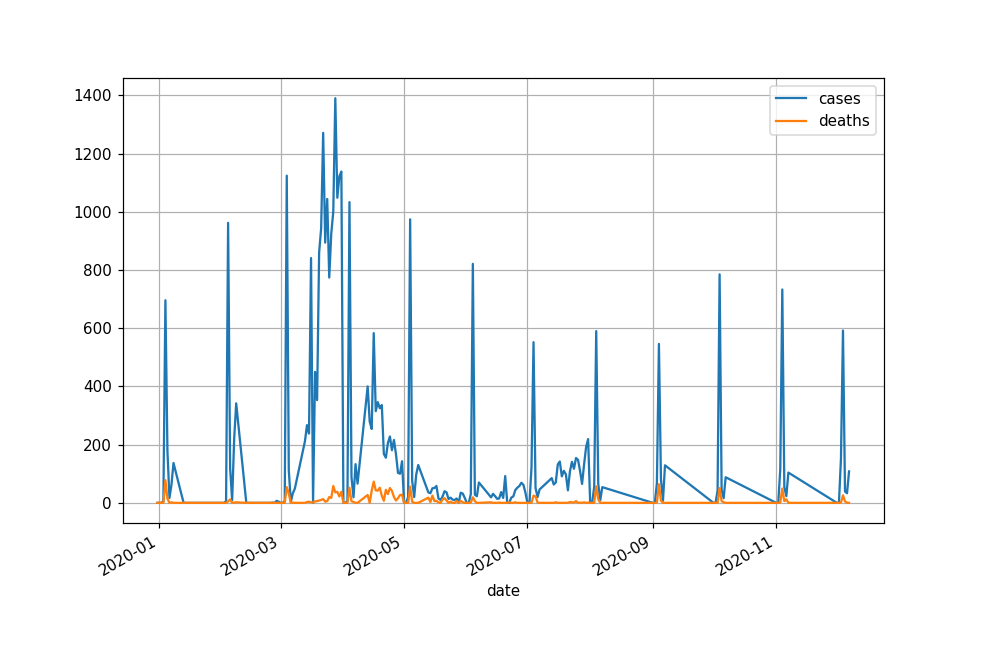

<IPython.core.display.Javascript object>


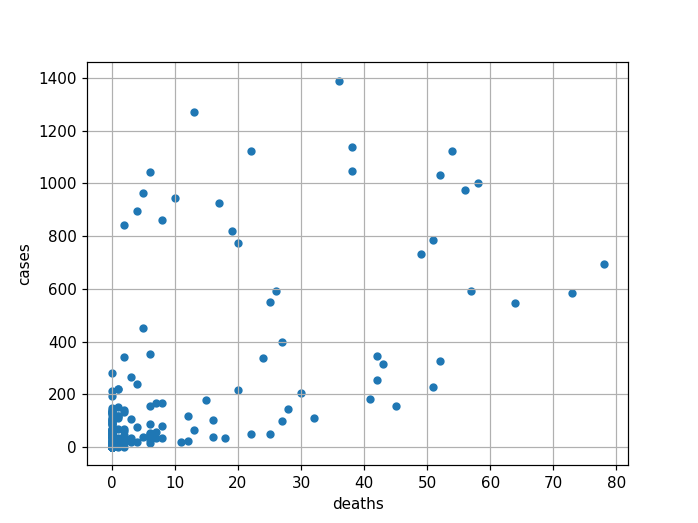

In [42]:
fig1, ax1 = plt.subplots(ncols=1, figsize=(9, 6))
switzerland.plot('date', 'cases', grid=True, ax=ax1)
switzerland.plot('date', 'deaths', grid=True, ax=ax1)
ax.set_xlabel('date')
ax.set_ylabel('')
handles, labels = ax1.get_legend_handles_labels()
order = [0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

switzerland.plot('deaths', 'cases', grid=True, kind='scatter')

Both plots look a bit funky though. And we will need to have deeper look at the data.